In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from six import StringIO  
from IPython.display import Image 
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from tqdm import tqdm
import time

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time= 4.1min
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=17.3min
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=18.1min
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=13.0min
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=27.8min
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=13.0min
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=27.8min
[CV] END bootstrap=True, max_depth=5

In [74]:
df = pd.read_csv("Diabetes.csv")

In [75]:
df

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,1,40,1,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,1,0,0,0,0,25,1,0,0,1,...,0,1,3,0,0,0,0,7,6,1
2,2,0,1,1,1,28,0,0,0,0,...,1,1,5,30,30,1,0,9,4,8
3,3,0,1,0,1,27,0,0,0,1,...,1,0,2,0,0,0,0,11,3,6
4,4,0,1,1,1,24,0,0,0,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249044,253675,0,1,1,1,45,0,0,0,0,...,1,0,3,0,5,0,1,5,6,7
249045,253676,1,1,1,1,18,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
249046,253677,0,0,0,1,28,0,0,0,1,...,1,0,1,0,0,0,0,2,5,2
249047,253678,0,1,0,1,23,0,0,0,0,...,1,0,3,0,0,0,1,7,5,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249049 entries, 0 to 249048
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Unnamed: 0            249049 non-null  int64
 1   Diabetes_012          249049 non-null  int64
 2   HighBP                249049 non-null  int64
 3   HighChol              249049 non-null  int64
 4   CholCheck             249049 non-null  int64
 5   BMI                   249049 non-null  int64
 6   Smoker                249049 non-null  int64
 7   Stroke                249049 non-null  int64
 8   HeartDiseaseorAttack  249049 non-null  int64
 9   PhysActivity          249049 non-null  int64
 10  Fruits                249049 non-null  int64
 11  Veggies               249049 non-null  int64
 12  HvyAlcoholConsump     249049 non-null  int64
 13  AnyHealthcare         249049 non-null  int64
 14  NoDocbcCost           249049 non-null  int64
 15  GenHlth               249049 non-n

In [77]:
df.columns

Index(['Unnamed: 0', 'Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

In [78]:
df.drop(columns=['PhysHlth', 'DiffWalk', 'Unnamed: 0', "Education"], inplace= True)

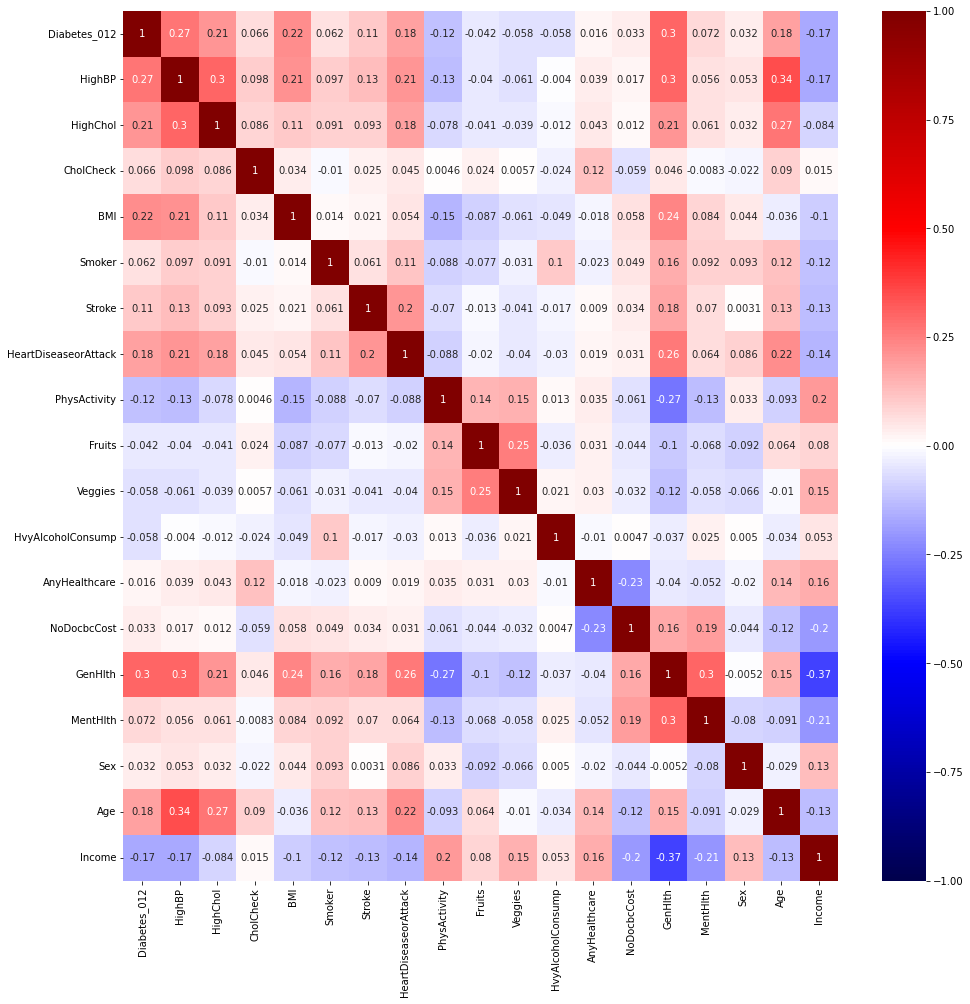

In [79]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);


<Figure size 1152x1152 with 0 Axes>

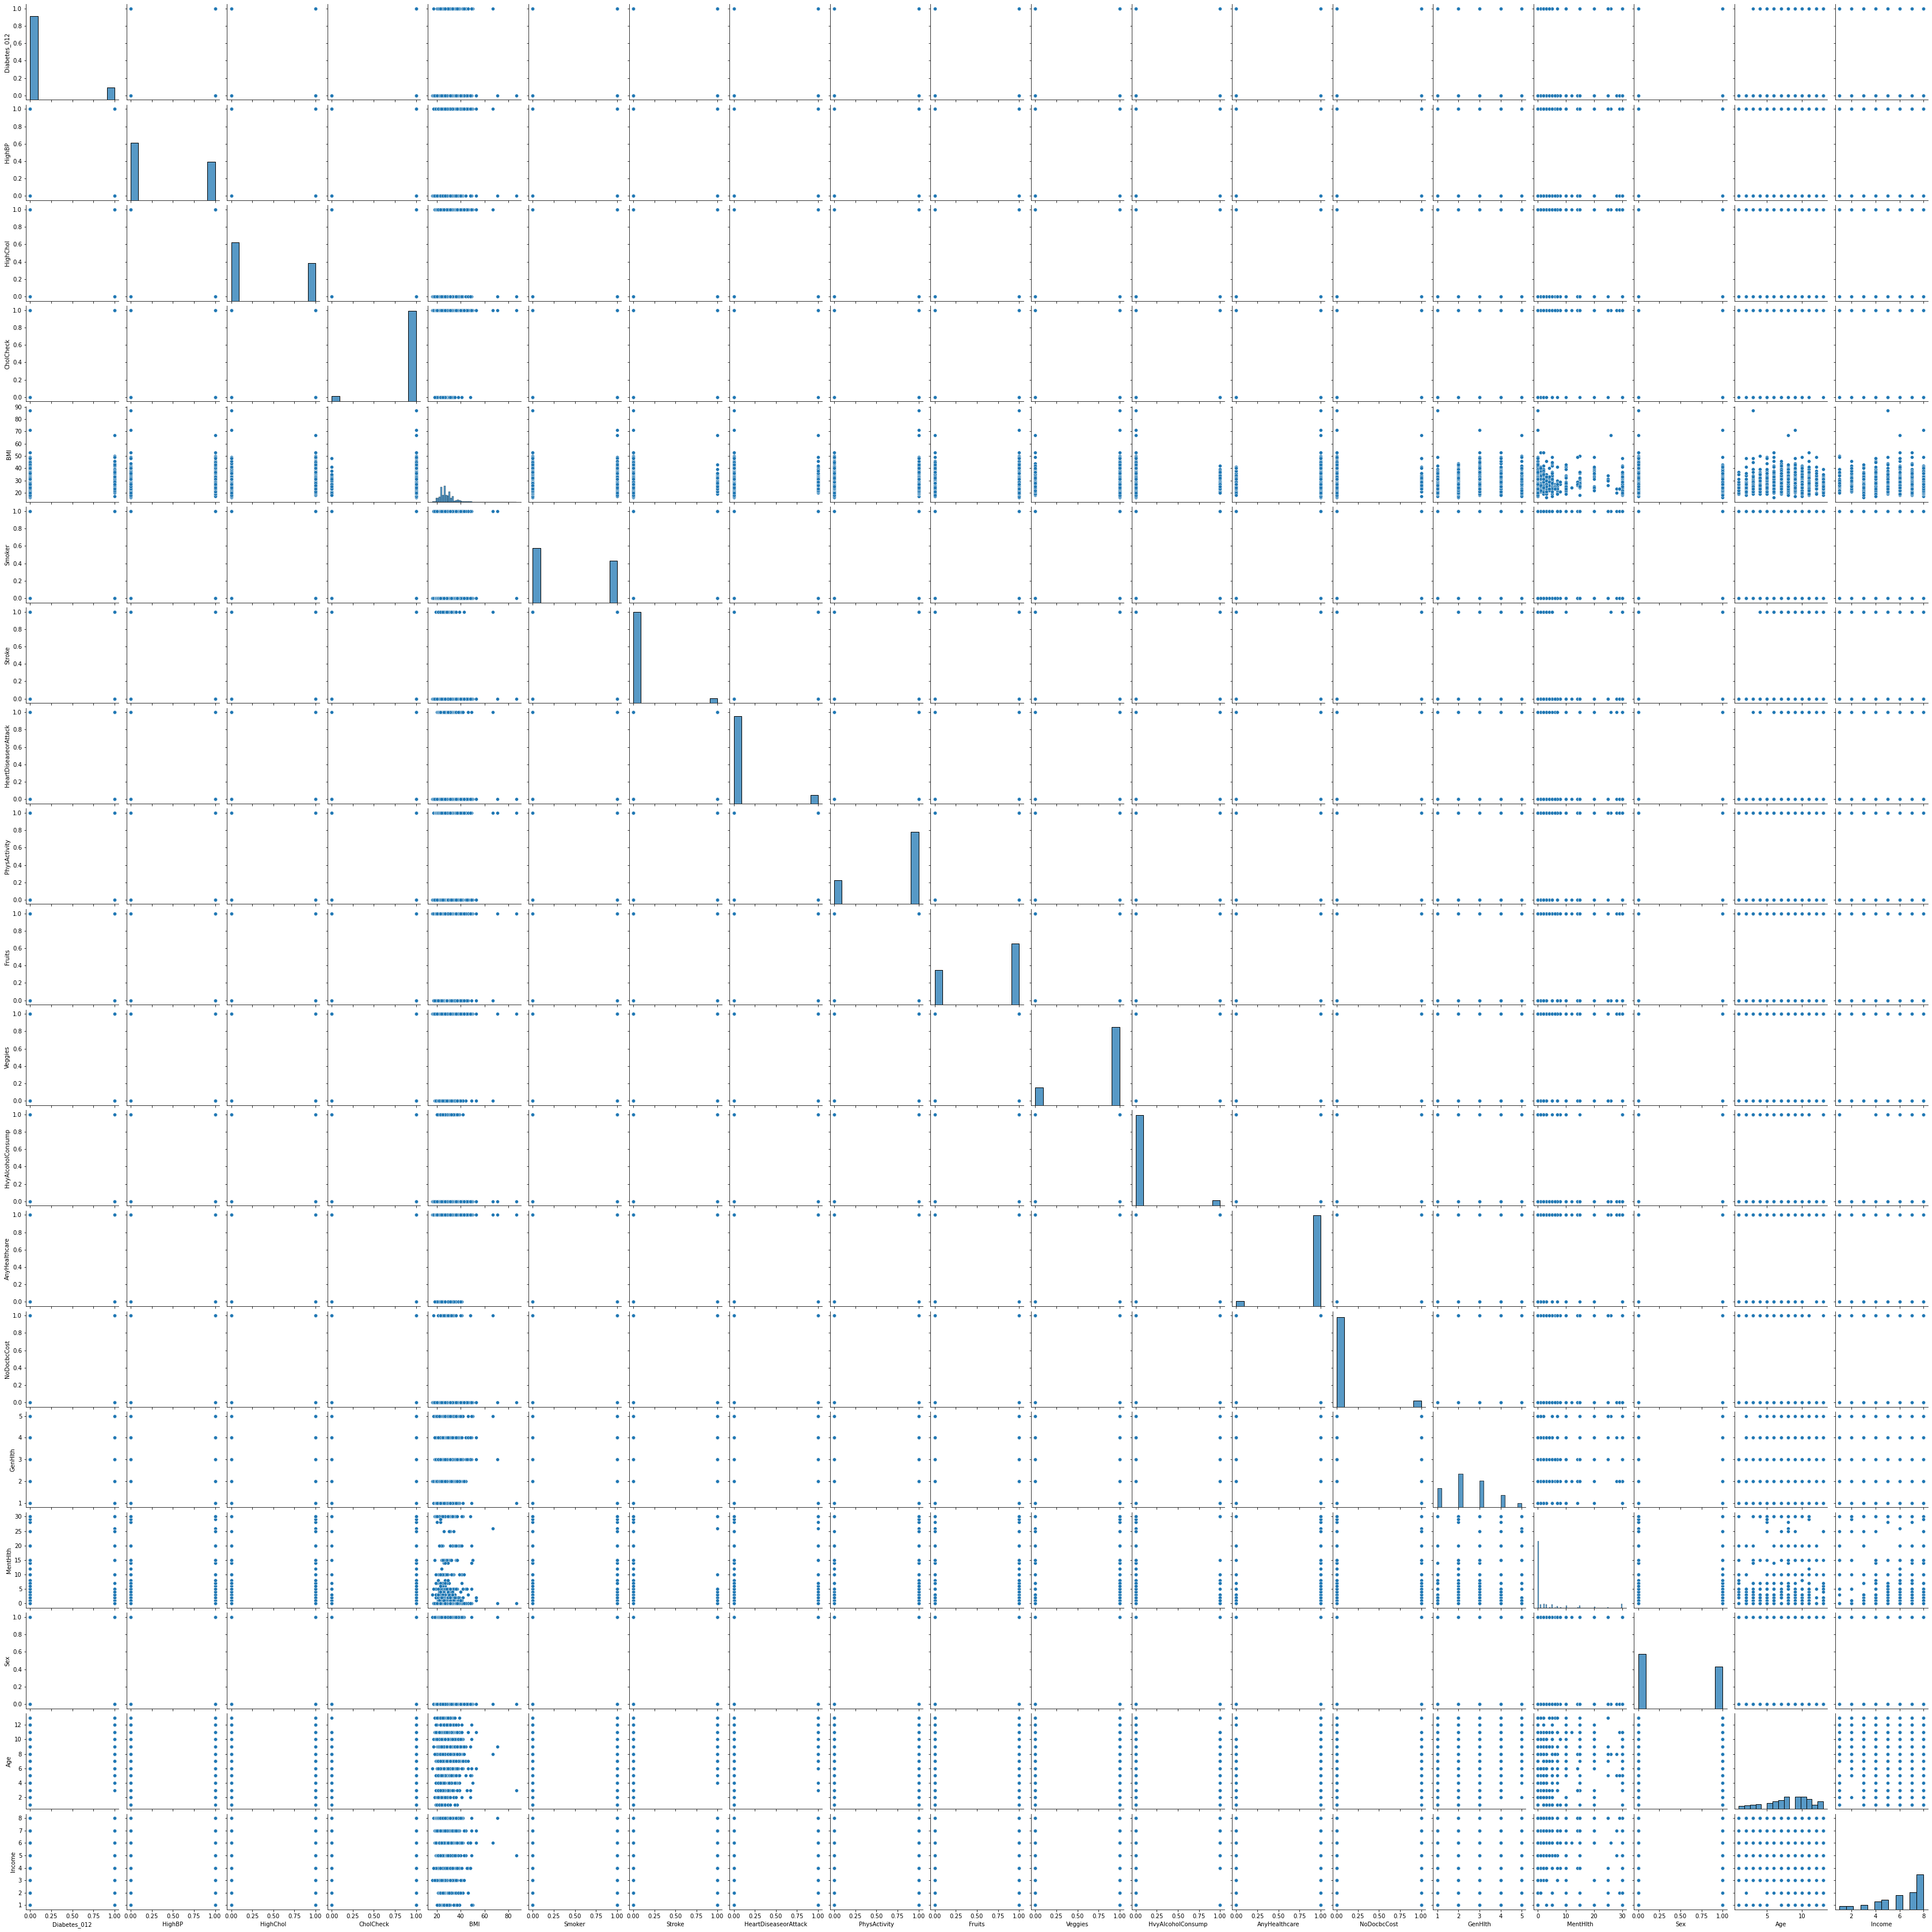

In [80]:
plt.figure(figsize=(16, 16))
sns.pairplot(df.sample(1000));


In [81]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'Sex', 'Age', 'Income'],
      dtype='object')

In [82]:
#Divide dataset into features and Traget variables
X= df.loc[:, "HighBP": "Income"]
y = df["Diabetes_012"]

In [83]:
def accuracy(actuals, preds):
    return np.mean(actuals == preds)

def precision(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fp = np.sum((actuals == 0) & (preds == 1))
    return tp / (tp + fp)

def recall(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fn = np.sum((actuals == 1) & (preds == 0))
    return tp / (tp + fn)

def F1(actuals, preds):
    p, r = precision(actuals, preds), recall(actuals, preds)
    return 2*p*r / (p + r)

0    0.858076
1    0.141924
Name: Diabetes_012, dtype: float64


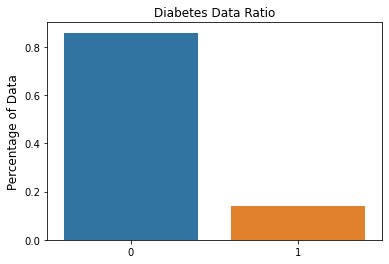

In [84]:
from sklearn.preprocessing import StandardScaler
target = df.Diabetes_012.value_counts(normalize=True) 
print(target)
sns.barplot(target.index, target.values)
plt.title('Diabetes Data Ratio')
plt.ylabel('Percentage of Data', fontsize=12);

# Split Data into Train and Test

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
X_train.shape, y_train.shape


((186786, 18), (186786,))

# Over Sample Data to Fix Imbalance

In [39]:
import imblearn.over_sampling

# Set up for the ration argument of RandomOverSampler Initialization 
#n_pos = np.sum(y_train == 1)
#n_neg = np.sum(y_train == 0)

#ratio = {1: n_pos *4, 0: n_neg}

In [124]:
#ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state = 42)

#X_train_rs, y_train_rs = ROS.fit_resample(X_train, y_train)

In [126]:
#X_train_rs.shape

(266346, 18)

In [72]:
#y_train_rs.shape

In [89]:
X_train_rs, y_train_rs = X_train, y_train

_____________________________________________________________________________________________________________________

# RANDOM Forest Algorithm

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#create a Gaussian Classifier
random_forest_clf=rfc = RandomForestClassifier(n_estimators=100, n_jobs = -1,class_weight={0:1, 1:3},random_state =50 , min_samples_leaf = 10)
rfc.fit(X_train_rs,y_train_rs)
y_pred_rfc = random_forest_clf.predict(X_test)

In [118]:
print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_rfc))

print(classification_report(y_test, y_pred_rfc))

confusion matrix: 

 [[46968  6469]
 [ 4054  4772]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     53437
           1       0.42      0.54      0.48      8826

    accuracy                           0.83     62263
   macro avg       0.67      0.71      0.69     62263
weighted avg       0.85      0.83      0.84     62263



In [119]:
scores = cross_val_score(random_forest_clf, X_train_rs, y_train_rs, cv=10)
print('Cross-Validation Accuracy Scores', scores)


Cross-Validation Accuracy Scores [0.83377054 0.82809572 0.82825633 0.83243214 0.83136142 0.83013009
 0.83167363 0.82835421 0.82685512 0.83167363]


In [120]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8268551236749117, 0.8302602845794242, 0.833770544461695)

In [121]:
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, random_forest_clf.predict(X_test)), 
         precision(y_test, random_forest_clf.predict(X_test)), 
         recall(y_test, random_forest_clf.predict(X_test)),
         F1(y_test, random_forest_clf.predict(X_test))
        )
     )

Random Forest validation metrics: 
 Accuracy: 0.8310 
 Precision: 0.4245 
 Recall: 0.5407 
 F1: 0.4756


In [122]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


# Random Hyperparameter Grid

In [160]:
from sklearn.model_selection import RandomizedSearchCV

#Number of Trees in random forest
n_estimators= [int(x) for x in np.linspace(start =200, stop = 2000, num = 10)]

#Number of features to consider at every split 
max_features = ["auto", "sqrt"]

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,110, num=11)]
max_depth.append(None)

#minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)
#On each iteration, the algorithm will choose a difference combination of the features.

NameError: name 'class_weight' is not defined

# Random Seach Training 


In [141]:
# Use the random grod to search for best hyperparameters
#First create the base model to tune
rf = RandomForestRegressor()

#Random search of parameters, using 3 fold cross validation 
#Search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                              n_iter = 75,
                              cv=3,
                              verbose =2,
                              random_state =42,
                              n_jobs = -1)

#Fit the random search model
rf_random.fit(X_train_rs, y_train_rs)


Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 4.0min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time= 3.5min
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time= 5.3min
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=15.3min
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time= 3.7min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time= 5.7min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimato

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=75,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

# View Best Paramters from fitting the Random Search 

In [142]:
rf_random.best_params_


{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 3.9min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time= 2.9min
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time= 4.5min
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=14.3min
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time= 3.1min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time= 4.9min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time= 3.6min
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 4.0min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time= 3.8min
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time= 5.3min
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=15.6min
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time= 3.7min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time= 5.7min
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=24.9min
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time= 3.2min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time= 3.4min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time= 3.7min
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time= 3.3min
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=17.1min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time= 4.3min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time= 4.6min
[CV] END bootstrap=False, max_depth=70

# Option 1

In [181]:
random_forest_clf=  RandomForestClassifier(n_estimators=1600,
                                               min_samples_split= 2,
                                               min_samples_leaf=  4,
                                               max_features= "sqrt",
                                               class_weight={0:1, 1:3.5},
                                               max_depth = 10,
                                               bootstrap= True)
random_forest_clf.fit(X_train_rs, y_train_rs)
y_pred_rfc = random_forest_clf.predict(X_test)

In [182]:
print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_rfc))

print(classification_report(y_test, y_pred_rfc))

confusion matrix: 

 [[44865  8572]
 [ 3273  5553]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88     53437
           1       0.39      0.63      0.48      8826

    accuracy                           0.81     62263
   macro avg       0.66      0.73      0.68     62263
weighted avg       0.86      0.81      0.83     62263



In [158]:
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, random_forest_clf.predict(X_test)), 
         precision(y_test, random_forest_clf.predict(X_test)), 
         recall(y_test, random_forest_clf.predict(X_test)),
         F1(y_test, random_forest_clf.predict(X_test))
        )
     )

Random Forest validation metrics: 
 Accuracy: 0.8263 
 Precision: 0.4175 
 Recall: 0.5710 
 F1: 0.4824


In [161]:
scores = cross_val_score(random_forest_clf, X_train_rs, y_train_rs, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.82646287 0.8252001  0.82495918 0.82378135 0.82383489]


In [162]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8237813528923629, 0.8248476780101575, 0.8264628727447936)

# Option 2 

In [163]:
random_forest_clf=  RandomForestClassifier(n_estimators=1600,
                                               min_samples_split= 2,
                                               min_samples_leaf=  4,
                                               max_features= "sqrt",
                                               class_weight="balanced",
                                               max_depth = 10,
                                               bootstrap= True)
random_forest_clf.fit(X_train_rs, y_train_rs)
y_pred_rfc = random_forest_clf.predict(X_test)

In [164]:
print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_rfc))

print(classification_report(y_test, y_pred_rfc))

confusion matrix: 

 [[38903 14534]
 [ 1933  6893]]
              precision    recall  f1-score   support

           0       0.95      0.73      0.83     53437
           1       0.32      0.78      0.46      8826

    accuracy                           0.74     62263
   macro avg       0.64      0.75      0.64     62263
weighted avg       0.86      0.74      0.77     62263



In [165]:
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, random_forest_clf.predict(X_test)), 
         precision(y_test, random_forest_clf.predict(X_test)), 
         recall(y_test, random_forest_clf.predict(X_test)),
         F1(y_test, random_forest_clf.predict(X_test))
        )
     )

Random Forest validation metrics: 
 Accuracy: 0.7355 
 Precision: 0.3217 
 Recall: 0.7810 
 F1: 0.4557


In [166]:
scores = cross_val_score(random_forest_clf, X_train_rs, y_train_rs, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.7339258  0.73573895 0.73482881 0.73568541 0.73734508]


In [167]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7339257990256438, 0.7355048107406963, 0.7373450758893916)

# Option 3

In [169]:
random_forest_clf=  RandomForestClassifier(n_estimators=1600,
                                               min_samples_split= 2,
                                               min_samples_leaf=  4,
                                               max_features= "sqrt",
                                               class_weight= 'balanced_subsample',
                                               max_depth = 10,
                                               bootstrap= True)
random_forest_clf.fit(X_train_rs, y_train_rs)
y_pred_rfc = random_forest_clf.predict(X_test)

In [171]:
print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_rfc))

print(classification_report(y_test, y_pred_rfc))

confusion matrix: 

 [[38908 14529]
 [ 1938  6888]]
              precision    recall  f1-score   support

           0       0.95      0.73      0.83     53437
           1       0.32      0.78      0.46      8826

    accuracy                           0.74     62263
   macro avg       0.64      0.75      0.64     62263
weighted avg       0.86      0.74      0.77     62263



In [172]:
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, random_forest_clf.predict(X_test)), 
         precision(y_test, random_forest_clf.predict(X_test)), 
         recall(y_test, random_forest_clf.predict(X_test)),
         F1(y_test, random_forest_clf.predict(X_test))
        )
     )

Random Forest validation metrics: 
 Accuracy: 0.7355 
 Precision: 0.3216 
 Recall: 0.7804 
 F1: 0.4555


In [174]:
scores = cross_val_score(random_forest_clf, X_train_rs, y_train_rs, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.73462177 0.7359531  0.73453436 0.73549803 0.73755923]


In [175]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7345343576839682, 0.7356332969897597, 0.7375592258479)

# Option 4

In [176]:
random_forest_clf=  RandomForestClassifier(n_estimators=1600,
                                               min_samples_split= 2,
                                               min_samples_leaf=  4,
                                               max_features= "sqrt",
                                               max_depth = 10,
                                               bootstrap= True)
random_forest_clf.fit(X_train_rs, y_train_rs)
y_pred_rfc = random_forest_clf.predict(X_test)

In [177]:
print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_rfc))

print(classification_report(y_test, y_pred_rfc))

confusion matrix: 

 [[52815   622]
 [ 7738  1088]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     53437
           1       0.64      0.12      0.21      8826

    accuracy                           0.87     62263
   macro avg       0.75      0.56      0.57     62263
weighted avg       0.84      0.87      0.82     62263



In [178]:
scores = cross_val_score(random_forest_clf, X_train_rs, y_train_rs, cv=10)
print('Cross-Validation Accuracy Scores', scores)


Cross-Validation Accuracy Scores [0.86589218 0.86401842 0.86396488 0.86375074 0.86455378 0.86487499
 0.86427883 0.86261912 0.86358282 0.86502838]


In [179]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8626191241032231, 0.864256413668586, 0.8658921783821404)

In [180]:
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, random_forest_clf.predict(X_test)), 
         precision(y_test, random_forest_clf.predict(X_test)), 
         recall(y_test, random_forest_clf.predict(X_test)),
         F1(y_test, random_forest_clf.predict(X_test))
        )
     )

Random Forest validation metrics: 
 Accuracy: 0.8657 
 Precision: 0.6363 
 Recall: 0.1233 
 F1: 0.2065


In [147]:
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, random_forest_clf.predict(X_test)), 
         precision(y_test, random_forest_clf.predict(X_test)), 
         recall(y_test, random_forest_clf.predict(X_test)),
         F1(y_test, random_forest_clf.predict(X_test))
        )
     )

Random Forest validation metrics: 
 Accuracy: 0.8263 
 Precision: 0.4173 
 Recall: 0.5688 
 F1: 0.4814


In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
random_forest_clf.feature_importances_


array([0.23158186, 0.09428715, 0.00824428, 0.16359886, 0.00406732,
       0.00752549, 0.04319175, 0.01373609, 0.00325301, 0.00336205,
       0.01017396, 0.00256151, 0.00269459, 0.25465543, 0.01146596,
       0.0069248 , 0.09340047, 0.04527541])

In [137]:
import pickle
with open('diabetes_model_random_forest.pkl', 'wb') as file:
    pickle.dump(random_forest_clf, file)

In [187]:
feature_names= df.columns.drop(['Diabetes_012'])

In [188]:
import time

start_time = time.time()
importances = random_forest_clf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in random_forest_clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.282 seconds


Text(0, 0.5, 'Mean decrease in impurity')

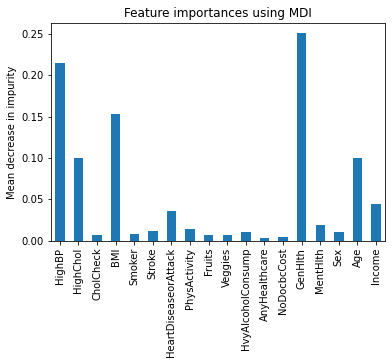

In [189]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")


# Test Scores on Holdout

In [183]:
random_forest_clf.fit(X_test, y_test)
random_forest_clf.score(X_test, y_test)

0.8279877294701508

ROC AUC score =  0.8625296834970432


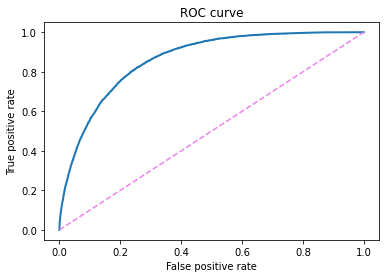

In [184]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, random_forest_clf.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, random_forest_clf.predict_proba(X_test)[:,1]))

In [185]:
from sklearn.metrics import confusion_matrix
def make_confusion_matrix(random_forest_clf, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (random_forest_clf.predict_proba(X_test)[:, 1] >= threshold)
    diabetes_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(diabetes_confusion, cmap=plt.cm.BuGn, annot=True, square=True, fmt='d',
           xticklabels=['No Diabetes', 'Diabetes'],
           yticklabels=['No Diabetes', 'Diabetes']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

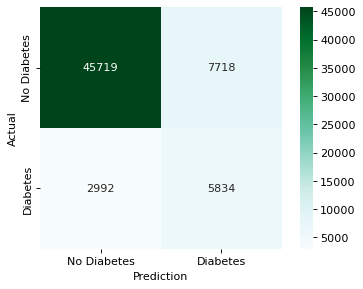

In [186]:
make_confusion_matrix(random_forest_clf)
